<a href="https://colab.research.google.com/github/namitarora10/AspireNex/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

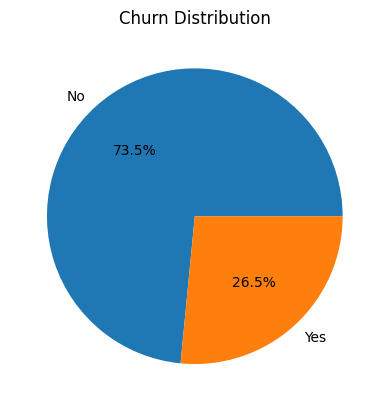

In [ ]:
# Count the occurrences of each churn value
churn_counts = data['Churn'].value_counts()

# Create a pie chart using matplotlib
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Churn Distribution')

plt.show()

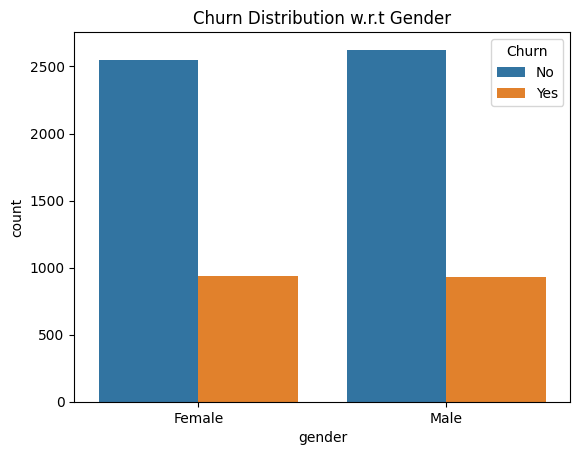

In [ ]:
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn Distribution w.r.t Gender')
plt.show()

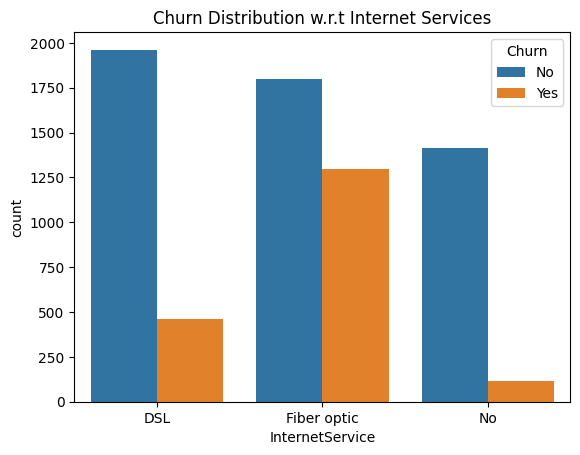

In [ ]:
# Crunch distribution wrt to internet services
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn Distribution w.r.t Internet Services')
plt.show()

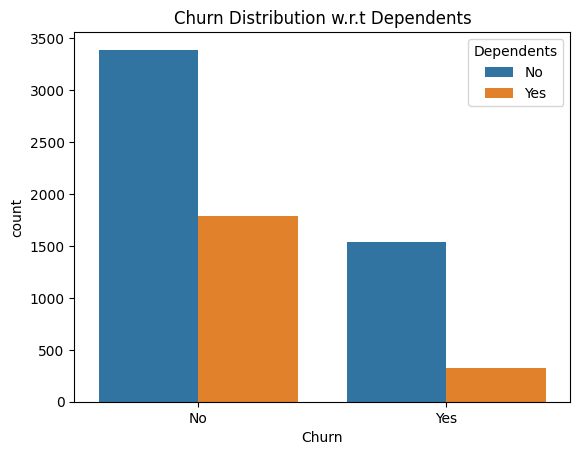

In [ ]:
# Dependent Distribution
sns.countplot(x='Churn', hue='Dependents', data=data)
plt.title('Churn Distribution w.r.t Dependents')
plt.show()

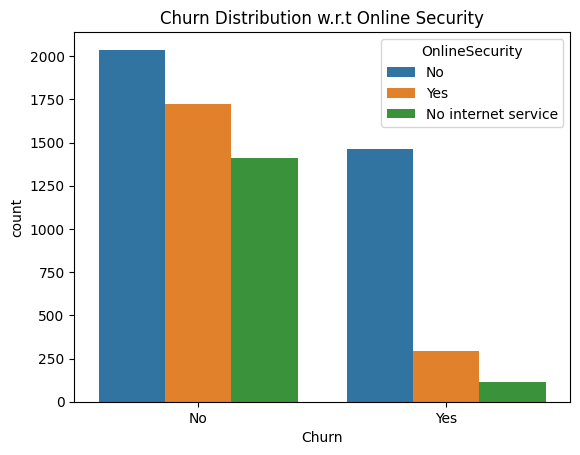

In [ ]:
# Chrun wrt to online security
sns.countplot(x='Churn', hue='OnlineSecurity', data=data)
plt.title('Churn Distribution w.r.t Online Security')
plt.show()

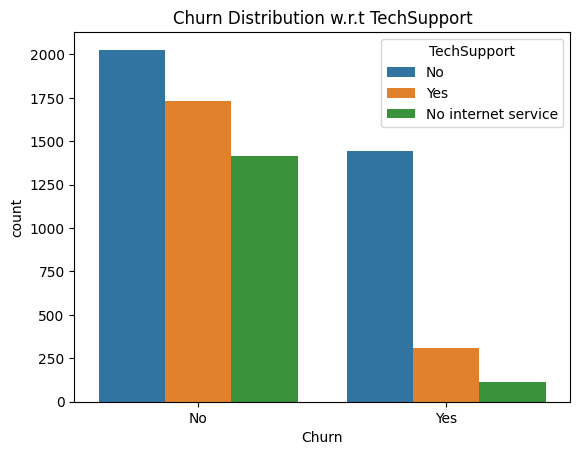

In [ ]:
# Chrun wrt to Techsupport
sns.countplot(x='Churn', hue='TechSupport', data=data)
plt.title('Churn Distribution w.r.t TechSupport')
plt.show()

In [ ]:
# Checking null Values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#changing the datatype of total charge
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data[pd.isnull(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# checking the index tenure column any other 0 values are present or not
data[data['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
data.drop(data[data['tenure']==0].index, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# Select categorical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'Churn']

# Encode categorical columns and assign back to the DataFrame
for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [ ]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [ ]:
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})


In [ ]:
 #Droping Unique Column
data.drop(['customerID'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
x= data.drop(['Churn'], axis=1)
y= data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
print('Confusion_matrix',confusion_matrix(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Accuracy_score',accuracy_score(y_test,y_pred))


Confusion_matrix [[914 119]
 [177 197]]
Classification_report               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy_score 0.7896233120113717


In [ ]:
# training accuracy
y_pred_train = lr_model.predict(x_train) # Predict labels for training data
accuracy_score(y_train, y_pred_train) # Calculate accuracy score with true and predicted labels

0.8081777777777778

In [ ]:
#Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x_train,y_train)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()

model_rf.fit(x_smote,y_smote)

y_pred_rf = model_rf.predict(x_test)

In [ ]:
# training accuracy
accuracy_score(y_test,y_pred_rf)

0.751954513148543

In [ ]:
# Testing Accuracy
print('Confusion_matrix',confusion_matrix(y_test,y_pred_rf))
print('Classification_report', classification_report(y_test,y_pred_rf))
print('Accuracy_score',accuracy_score(y_test,y_pred_rf))


Confusion_matrix [[857 176]
 [173 201]]
Classification_report               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.54      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

Accuracy_score 0.751954513148543


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Scale numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')



Accuracy: 0.7882
Precision: 0.6329
Recall: 0.4840
F1 Score: 0.5485
AUC-ROC: 0.8336
